# Lab Exercises Week 9

#### Code set up

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [15]:

def solve_coupled(f,n,r0,interval,steps,*args,order=1):
    """ Solve system of coupled ODEs by Euler or Runge-Kutta methods,
    with fixed number of steps.

    f: vector function giving ODE as r'=f(t,r)
       Should return numpy array, so array arithmetic works.
       Note opposite argument order to Newman.
       We put independent variable first.
    n: number of spatial dimensions (i.e., dependent variables)
    r0: vector initial value
    interval: tuple region (a,b) on which to solve ODE
    steps: number of steps
    order: order of solution method (1 for Euler, 2 or 4 for Runge-Kutta) 
    
    Returns points (t,r1,...,rn), as (steps+1)x(n+1) numpy array.
    """

    # set up solution mesh
    # points will be indexed 0..steps
    (a,b) = interval  # endpoints
    h = (b-a)/steps  # step size
    points = np.zeros((steps+1,n+1))

    # set up initial point
    t = a    # current point t value
    r = r0   # current point r value
    points[0,0] = t
    points[0,1:] = r
    ## # alternatively:
    ## for i in range(n):
    ##     points[0,i+1] = r[i]

    for i in range(1,steps+1):

        # evaluate new point
        t_new = t + h
        if (order == 1):
            # Euler
            r_new = r + h * f(t,r,*args)
        elif (order == 2):
            # second-order Runge-Kutta
            # Newman (8.13)
            k1 = h * f(t,r,*args)
            k2 = h * f(t+1/2*h,r+1/2*k1,*args)
            r_new = r + k2
        elif (order == 4):
            #print(order)
            # fourth-order Runge-Kutta
            # Newman (8.17)
            k1 = h * f(t,r,*args)
            k2 = h * f(t+1/2*h,r+1/2*k1,*args)
            k3 = h * f(t+1/2*h,r+1/2*k2,*args)
            k4 = h * f(t+h,r+k3,*args)
            r_new = r + 1/6*(k1+2*k2+2*k3+k4)

        # save new point
        (t,r) = (t_new,r_new)
        points[i,0] = t
        points[i,1:] = r

    return points

## Newman 8.4 - The non-linear pendulum

This problem will model the behavior of a non-linear pendulum. The equation of mothion for the pendulum is in the form of:

$\frac{d^2\theta}{dt^2}= \frac{-g}{l}sin\theta$

By defining a new variable $\omega$, the above equation becomes two first order equtions:
$\frac{d\theta}{dt}=\omega$
and
$\frac{d\omega}{dt}=\frac{-g}{l}sin\theta$

We will use the 4th order Runge-Kutta method to solve for the two equations simulatneously and get the angle of displacement as a function of time> We will also change the length of the pendulum arm to see how it affects the angle of displacement as a function of time.


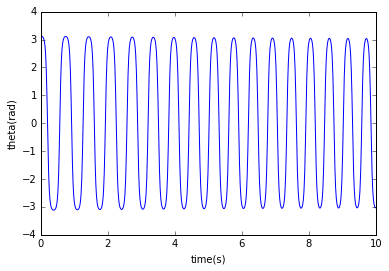

In [27]:
# inital code to get it working

#constants
g= 9.81  #units of m/s^2
l= 0.01  #length of the pendulum arm, units of m

theta0= 179*(math.pi/180) # initial condition, pendulum will be released at this angle
omega0= 0
r0= (theta0,omega0)
interval= np.array([0,10],float) #time interval we let solve_couple go to

def pendulum(t,r,l):         # function that has both differential equations
    theta= r[0]            #unpacks r values
    omega= r[1]
    ftheta= omega
    fomega= -(g/l)*math.sin(theta)
    return np.array([ftheta,fomega],float)

rtpoints= solve_coupled(pendulum,2,r0,interval,1000,l,order=4)      # use solve coupled func to do 4ht order Kunge-Kutta
r= rtpoints[:,1]                                    # unpacking the values from solve_coupled into individual r and t arrays
t= rtpoints[:,0]

plt.plot(t,r)
plt.xlabel("time(s)")
plt.ylabel("theta(rad)")

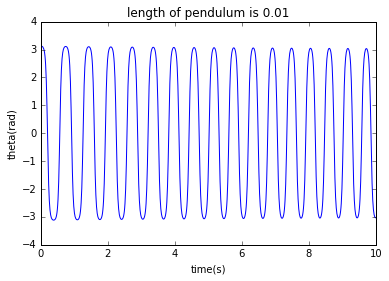

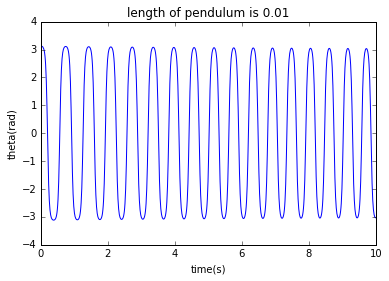

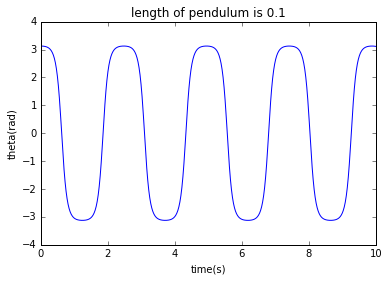

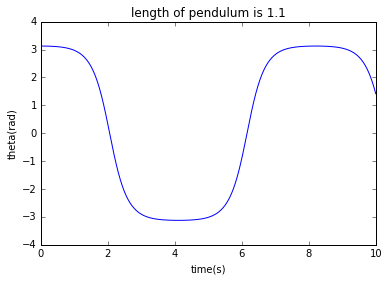

In [28]:
#Test cases: changing length of the pendulum string
length=[.01,.01,.1,1.10]

for i in length:
    
    rtpoints= solve_coupled(pendulum,2,r0,interval,1000,i,order=4) 
    r= rtpoints[:,1]                                   
    t= rtpoints[:,0]

    plt.plot(t,r)
    plt.xlabel("time(s)")
    plt.ylabel("theta(rad)")
    plt.title("length of pendulum is {}".format(i))
    plt.show()

We see as the length of the pendulum arm increases, the number of oscillations decrease. This 

## Exercise 8.5


As a continuation of the previous exercise, we modified the differential equation that describes the motion for the pendulum to:

$\frac{d^2\theta}{dt^2}= \frac{-g}{l}sin\theta + Ccos\theta sin\Omega t$

The addition of the  $Ccos\theta sin\Omega t$ causes this to be a driven pendulum. This means that a small oscillating force is applied horizontally on the mass. 

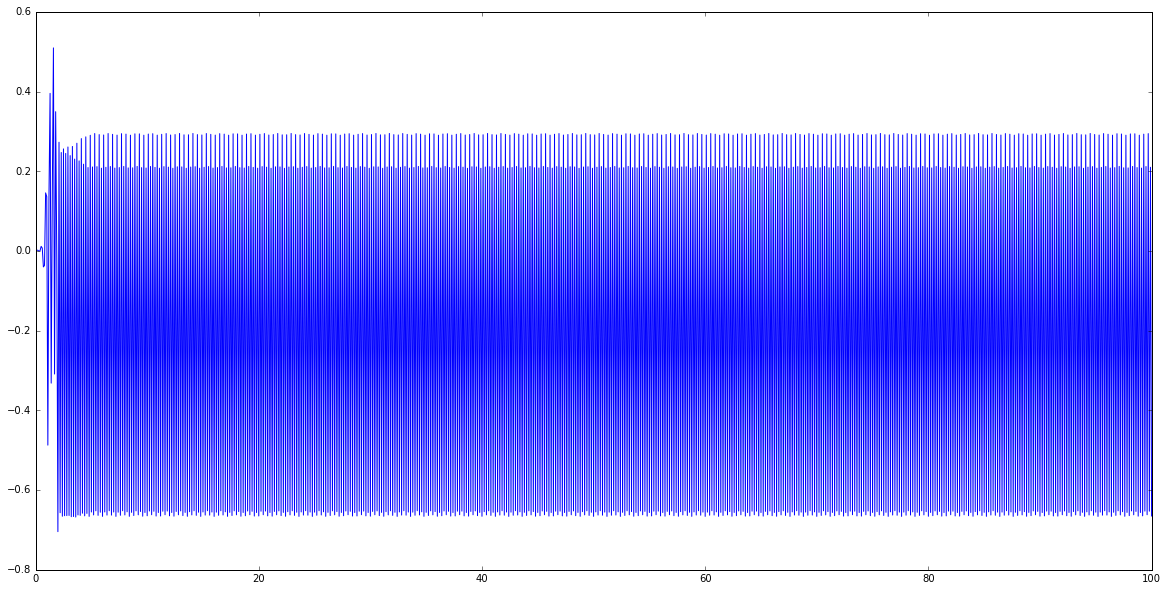

In [18]:
#Constants 
C= 2.0                                           #units of s^-2
bigOmega= 5                                 #units of s^-1
driven_interval= np.array([0.0,100.0],float)               # time interval in seconds

initTheta= 0.0*(math.pi/180)                              # inital condition for theta
initOmega= 0.0                                  # initial condition ofr omega 
r0= [initTheta,initOmega]                    # inital conditions set as a vector




def driven_pen(t,r,C,bigOmega):
    #print(C)
    #print(bigOmega)
    #print ("time is ",t)
    dtheta= r[0]
    domega= r[1]
    ftheta= domega
    fomega= -(g/l)*math.sin(dtheta) + C*math.cos(dtheta)*math.sin(bigOmega*t)
    return np.array ([ftheta,fomega],float)



rtpoints1= solve_coupled(driven_pen,2,r0,driven_interval,1000,C,bigOmega,order=4)

r1= rtpoints1[:,1]
t1= rtpoints1[:,0]

plt.figure(figsize=(20, 10))
plt.plot(t1,r1)

The code above is the one that I have been working on. Unfortunatley I cannot figure out where my bug is. For the sake of doing an analysis I copied in eric's code (with his permission) in the cell below and modified it to my test cases. 

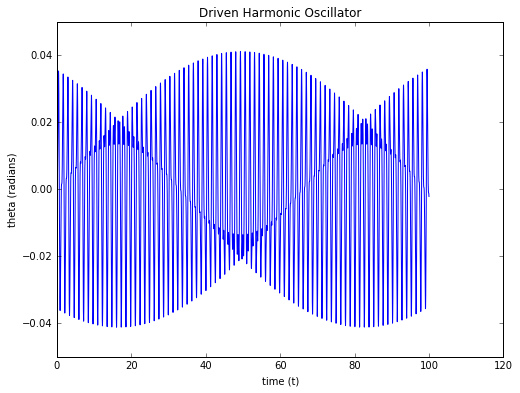

In [30]:
# Eric's Code for 4th order Kunge kutta for a driven pendulum 
# constants
C = 2 # inverse seconds squared
capital_omega = 5 #inverse seconds
g = 9.81 # meters per second squared
l = 0.1 # meters
r0 = 0*math.pi/180  # radians
interval = np.array([0,100],float) # seconds

def f(t,r):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*math.sin(theta)+C*math.cos(theta)*math.sin(capital_omega*t)
    return np.array([ftheta,fomega],float)

points = solve_coupled(f,2,(r0,0),interval,10000,order=4)
r = points[:,1]
t = points[:,0]
plt.figure(figsize=(8, 6))
plt.plot(t,r)
plt.title("Driven Harmonic Oscillator")
plt.xlabel("time (t)")
plt.ylabel("theta (radians)")